## 1. Importação da base de dados

Nesta etapa importamos a biblioteca **pandas** e carregamos o arquivo `base-acoes.csv` que contém as informações das ações.  
O comando `df.head()` mostra as primeiras linhas da tabela para conferirmos se os dados foram carregados corretamente.

In [24]:
# Instalação de bibliotecas necessárias
import pandas as pd

df = pd.read_csv("base-acoes.csv")
print(df.head())


  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0     VALE3            194          45                            2134
1     SUZB3             91          71                            3069
2     SUZB3            165          41                            2815
3     SUZB3             56          34                            3613
4    GOOGLE            212           9                            2975


## 2. Renomeação das colunas

Nesta etapa renomeamos as colunas da base de dados para nomes mais simples e consistentes,
removendo espaços e caracteres especiais.  
Isso facilita o uso das colunas em funções de análise e visualização.

In [25]:
df.rename(columns={
    "nome ação": "nome_acao",
    "preço ação R$": "preco_acao",
    "qtde cotas": "qtde_cotas",
    "valor de mercado R$ -(Bilhões)": "valor_mercado"
}, inplace=True)

print(df.columns)


Index(['nome_acao', 'preco_acao', 'qtde_cotas', 'valor_mercado'], dtype='object')


## 3. Exploração dos dados

Nesta etapa utilizamos **boxplots** para analisar a distribuição dos preços das ações e dos valores de mercado.  
O objetivo é identificar **outliers** (valores muito acima ou abaixo da média) que podem impactar a análise de clusters.

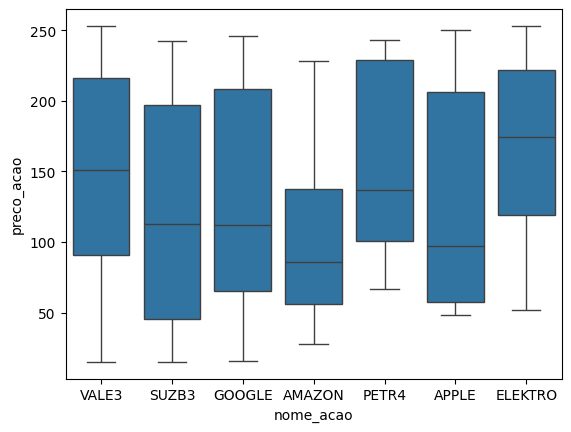

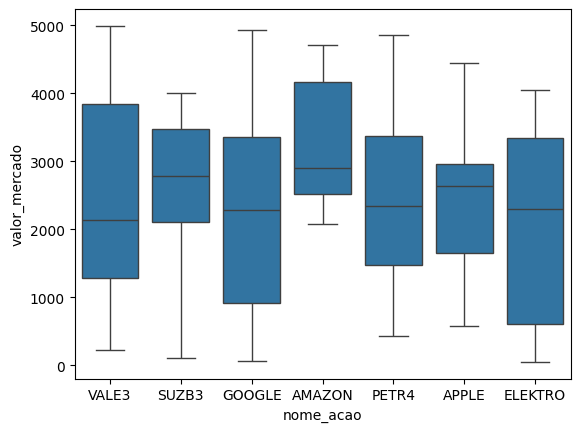

In [16]:
# Exploração dos dados
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="nome_acao", y="preco_acao", data=df)
plt.show()

sns.boxplot(x="nome_acao", y="valor_mercado", data=df)
plt.show()


## 4. Pré-processamento dos dados

Nesta etapa transformamos a variável categórica **nome_acao** em variáveis numéricas utilizando `pd.get_dummies`.  
Esse processo cria colunas binárias para cada ação, permitindo que o algoritmo K-Means consiga processar os dados.  
Utilizamos o parâmetro `drop_first=True` para evitar redundância entre as variáveis criadas.

In [12]:
# Pré-processamento dos dados
df_encoded = pd.get_dummies(df, columns=["nome_acao"], drop_first=True)


## 5. Agrupamento com K-Means

Aplicamos o algoritmo **K-Means** para agrupar as ações com base em três variáveis:
- Preço da ação
- Quantidade de cotas
- Valor de mercado

Neste exemplo, utilizamos **4 clusters**.  
O resultado é uma nova coluna chamada `cluster` no DataFrame, indicando a qual grupo cada ação pertence.

In [17]:
#Agrupamento com K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_encoded[["preco_acao", "qtde_cotas", "valor_mercado"]]

# Exemplo com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

df["cluster"] = labels
print(df.head())


  nome_acao  preco_acao  qtde_cotas  valor_mercado  cluster
0     VALE3         194          45           2134        3
1     SUZB3          91          71           3069        2
2     SUZB3         165          41           2815        3
3     SUZB3          56          34           3613        2
4    GOOGLE         212           9           2975        2


## 6. Avaliação dos clusters: método do cotovelo

Nesta etapa utilizamos o **método do cotovelo** para determinar o número ideal de clusters.  
O gráfico mostra a relação entre o número de clusters e a inércia (soma das distâncias dentro dos grupos).  
O ponto onde a curva apresenta uma queda acentuada seguida de estabilização indica o número de clusters mais adequ

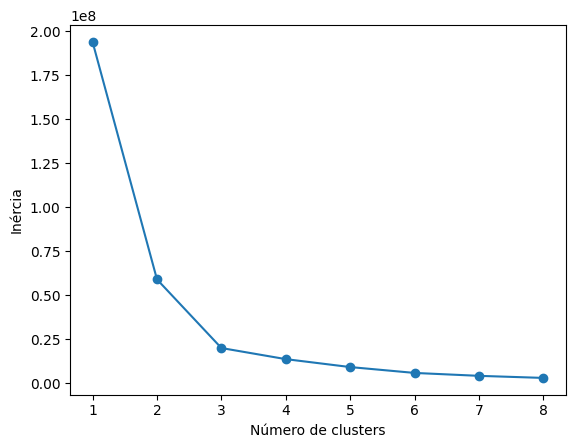

In [18]:
# Gráfico do cotovelo para determinar o número ideal de clusters
inertia = []
for k in range(1, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 9), inertia, marker="o")
plt.xlabel("Número de clusters")
plt.ylabel("Inércia")
plt.show()


## 7. Avaliação dos clusters: coeficiente de silhueta

Utilizamos o **coeficiente de silhueta** para avaliar a qualidade dos agrupamentos.  
Esse índice varia de -1 a 1 e indica o quão bem separados estão os clusters:  
- Valores próximos de 1 → clusters bem definidos.  
- Valores próximos de 0 → clusters sobrepostos.  
- Valores negativos → agrupamento inadequado.  

Testamos os agrupamentos com 4, 5 e 8 clusters e comparamos os resultados.

In [19]:
# Silhueta para avaliar a qualidade dos clusters
for k in [4, 5, 8]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhueta para {k} clusters: {score}")


Silhueta para 4 clusters: 0.540954447970341
Silhueta para 5 clusters: 0.532126509564633
Silhueta para 8 clusters: 0.541041065675374


## 8. Instalação da biblioteca Plotly

Nesta etapa instalamos a biblioteca **Plotly**, que será utilizada para gerar gráficos interativos em 2D e 3D.  
Após a instalação, é necessário reiniciar o kernel para que o notebook reconheça a biblioteca corretamente.

In [20]:
# Instalação da biblioteca Plotly
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 9. Instalação da biblioteca nbformat

Nesta etapa instalamos a biblioteca **nbformat**, necessária para que o Plotly consiga renderizar gráficos interativos dentro do notebook.  
Após a instalação, é importante reiniciar o kernel para que a biblioteca seja reconhecida corretamente.

In [21]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 10. Importação da biblioteca Plotly

Nesta etapa importamos a biblioteca **Plotly Express** (apelidada de `px`), que será utilizada para gerar gráficos interativos em 2D e 3D.  
O uso de `px` facilita a chamada das funções de visualização, como `px.scatter` e `px.scatter_3d`.

In [22]:
# importação da biblioteca Plotly
import plotly.express as px


## 11. Visualização dos clusters

Nesta etapa geramos gráficos interativos para visualizar os agrupamentos formados pelo algoritmo K-Means:

- **Gráfico 2D**: preço da ação vs valor de mercado.  
- **Gráfico 3D**: preço da ação vs valor de mercado vs quantidade de cotas.  

Essas visualizações permitem compreender melhor como as ações foram agrupadas e identificar padrões entre os ativos.

In [23]:
# Visualização dos clusters

# 2D: preço vs valor de mercado.

# 3D: preço vs valor de mercado vs quantidade de cotas.


fig = px.scatter(df, x="preco_acao", y="valor_mercado", color="cluster")
fig.show()

fig3d = px.scatter_3d(df, x="preco_acao", y="valor_mercado", z="qtde_cotas", color="cluster")
fig3d.show()



## 12. Conclusão teórica

**Qual a maior vantagem do aprendizado não supervisionado diante do aprendizado supervisionado?**

A principal vantagem do aprendizado não supervisionado é que ele permite **descobrir padrões e agrupamentos ocultos em dados sem rótulos**, revelando estruturas naturais que não seriam percebidas de outra forma.  
Isso é especialmente útil em cenários onde não temos categorias pré-definidas ou dados rotulados, possibilitando a exploração e geração de insights inesperados.
